In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [69]:
df = pd.read_csv('/home/amckann/PycharmProjects/DV_climagraph/data/31-pcp-1-1-1895-2021.csv')

In [70]:
df = df.dropna()

In [71]:
df

,North Carolina,Precipitation,January
3,Date,Value,Anomaly
4,189501,6.51,2.72
5,189601,2.72,-1.07
6,189701,2.24,-1.55
7,189801,2.68,-1.11
...,...,...,...
126,201701,3.96,0.17
127,201801,3.79,0.00
128,201901,3.85,0.06
129,202001,4.37,0.58


In [74]:
df.drop(3,0)

/tmp/ipykernel_434267/3970919270.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(3,0)


,North Carolina,Precipitation,January
4,189501,6.51,2.72
5,189601,2.72,-1.07
6,189701,2.24,-1.55
7,189801,2.68,-1.11
8,189901,3.80,0.01
...,...,...,...
126,201701,3.96,0.17
127,201801,3.79,0.00
128,201901,3.85,0.06
129,202001,4.37,0.58


In [77]:
early = df.iloc[0:50,:]

In [78]:
late = df.iloc[-50:-1, :]

In [123]:
early

,North Carolina,Average Temperature,December
3,Date,Value,Anomaly
4,189512,41.4,-0.5
5,189612,39.3,-2.6
6,189712,42.8,0.9
7,189812,41.1,-0.8
8,189912,40.1,-1.8
9,190012,40.4,-1.5
10,190112,38.9,-3.0
11,190212,40.9,-1.0
12,190312,35.8,-6.1


In [86]:
arr = np.array(early[' Precipitation'][2:])

In [88]:
arr = arr.astype('float')

In [89]:
arr

array([2.72, 2.24, 2.68, 3.8 , 3.54, 3.1 , 2.66, 3.66, 2.92, 2.99, 5.55,
       0.82, 4.52, 2.01, 3.33, 3.02, 3.82, 4.3 , 2.65, 6.19, 2.87, 4.06,
       4.59, 4.61, 2.89, 4.01, 4.61, 3.71, 4.45, 6.21, 4.97, 1.23, 1.45,
       3.65, 3.92, 2.18, 4.68, 2.89, 1.99, 3.84, 7.63, 7.79, 2.84, 3.72,
       3.  , 1.96, 2.34, 4.36])

In [90]:
np.mean(arr)

3.603541666666666

In [147]:
import os

early_mu = []
late_mu = []
early_max = []
late_max = []
early_min = []
late_min = []
directory = r'/home/amckann/PycharmProjects/DV_climagraph/data'
for entry in os.scandir(directory):
    # preprocessing
    df = pd.read_csv(entry.path)
    df = df.dropna()
    df.drop(3,0)
    early = df.iloc[0:50,:]
    late = df.iloc[-50:-1, :]
    try:
        early_arr = np.array(early[' Precipitation'][2:])
        late_arr = np.array(late[' Precipitation'][2:])
    except KeyError:
        early_arr = np.array(early[' Average Temperature'][2:])
        late_arr = np.array(late[' Average Temperature'][2:])
    early_arr = early_arr.astype('float')
    late_arr = late_arr.astype('float')
    early_mu.append(np.mean(early_arr))
    late_mu.append(np.mean(late_arr))
    early_max.append(np.max(early_arr))
    late_max.append(np.max(late_arr))
    early_min.append(np.min(early_arr))
    late_min.append(np.min(late_arr))


/tmp/ipykernel_434267/3148245671.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(3,0)


KeyError: ' Average Temperature'

In [148]:
months = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December',
]

In [149]:
d = {
    '1895:1943 Average Precipitation'   : early_mu[0:12],
    '1895:1943 Max Precipitation'       : early_max[0:12],
    '1895:1943 Min Precipitation'       : early_min[0:12],
    '1895:1943 Average Temperature'     : early_mu[12:],
    '1895:1943 Max Average Monthly Temperature' : early_max[12:],
    '1895:1943 Min Average Monthly Temperature'         : early_min[12:],

    '1972:2020 Average Precipitation'   : late_mu[0:12],
    '1972:2020 Max Precipitation'       : late_max[0:12],
    '1972:2020 Min Precipitation'       : late_min[0:12],
    '1972:2020 Average Temperature'     : late_mu[12:],
    '1972:2020 Max Average Monthly Temperature'         : late_max[12:],
    '1972:2020 Min Average Monthly Temperature'         : late_min[12:],

    'Month' : months
}

<AxesSubplot:>

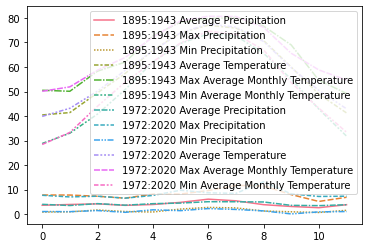

In [150]:
sns.lineplot(data=d)

In [151]:
final_data = pd.DataFrame(d)

In [152]:
final_data

,1895:1943 Average Precipitation,1895:1943 Max Precipitation,1895:1943 Min Precipitation,1895:1943 Average Temperature,1895:1943 Max Average Monthly Temperature,1895:1943 Min Average Monthly Temperature,1972:2020 Average Precipitation,1972:2020 Max Precipitation,1972:2020 Min Precipitation,1972:2020 Average Temperature,1972:2020 Max Average Monthly Temperature,1972:2020 Min Average Monthly Temperature,Month
0,3.603542,7.79,0.82,40.450000,50.5,28.8,3.990638,7.68,1.05,39.846809,50.1,28.4,January
1,3.929375,7.78,0.93,41.410417,50.1,33.0,3.506596,7.01,1.00,43.165957,51.9,33.3,February
2,4.182708,7.28,1.67,49.458333,58.3,40.8,4.275319,7.30,1.44,50.159574,58.7,44.0,March
3,3.573333,6.51,1.05,57.352083,62.0,50.8,3.645319,6.50,0.73,58.640426,63.9,53.8,April
4,3.915625,8.16,0.86,66.800000,72.7,62.0,4.255532,7.62,1.75,66.544681,72.2,62.1,May
5,4.793750,8.18,2.06,73.958333,78.3,69.6,4.501489,9.74,1.41,73.948936,78.8,69.8,June
6,6.094583,9.59,2.73,77.014583,79.7,73.5,5.060638,8.69,2.26,77.553191,80.7,74.6,July
7,5.432292,11.72,2.53,75.866667,80.2,72.7,5.039574,8.45,1.90,76.246809,80.6,73.4,August
8,3.855625,11.50,1.27,70.816667,76.7,65.6,4.948298,13.22,1.31,70.408511,76.2,67.0,September
9,3.109583,7.96,0.95,59.981250,69.0,55.1,3.576596,8.26,0.08,59.729787,65.6,53.6,October


In [153]:
final_data.to_csv('/home/amckann/PycharmProjects/DV_climagraph/data/final_data.csv')